## Data Collection

In [2]:
# Importing libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Number of rows and columns in the dataset
df.shape

(768, 9)

In [6]:
# Getting the statistical measures of the data 
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
# Number of diabetic and non-diabetic patients in the dataset
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Number of missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Other basic information about the dataset
print("Shape of the dataset: ", df.shape)
print("Column names: ", df.columns)
print("Data types: ", df.dtypes)

Shape of the dataset:  (768, 9)
Column names:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Data types:  Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


## Exploratory Data Analysis 

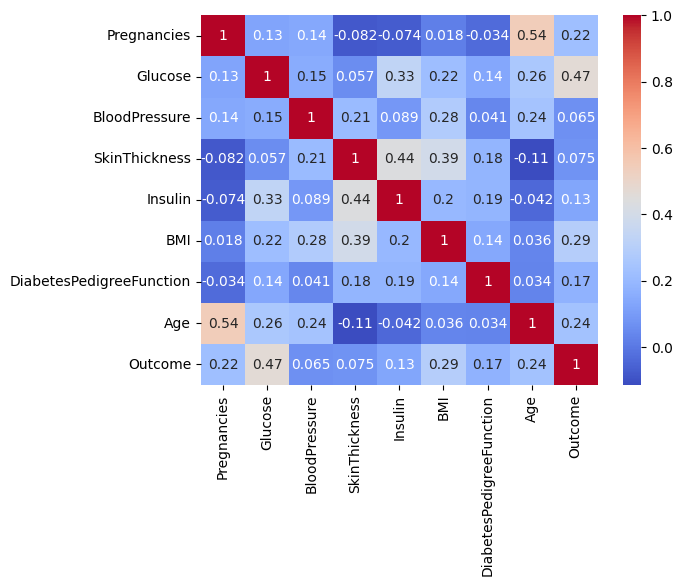

In [10]:
# Using heatmap to check correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<AxesSubplot: xlabel='Outcome', ylabel='count'>

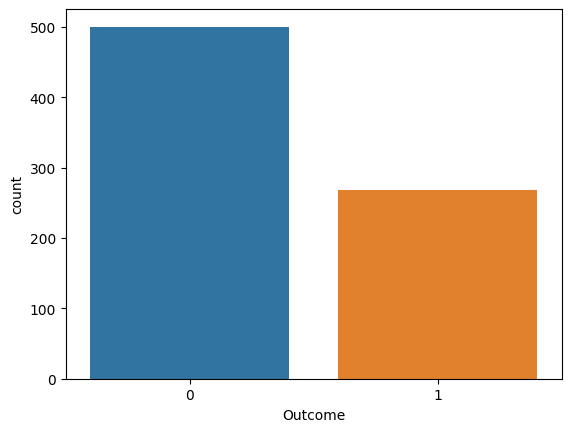

In [11]:
# Visualizing the number of diabetic and non-diabetic patients in the dataset 
sns.countplot(x='Outcome', data = df)

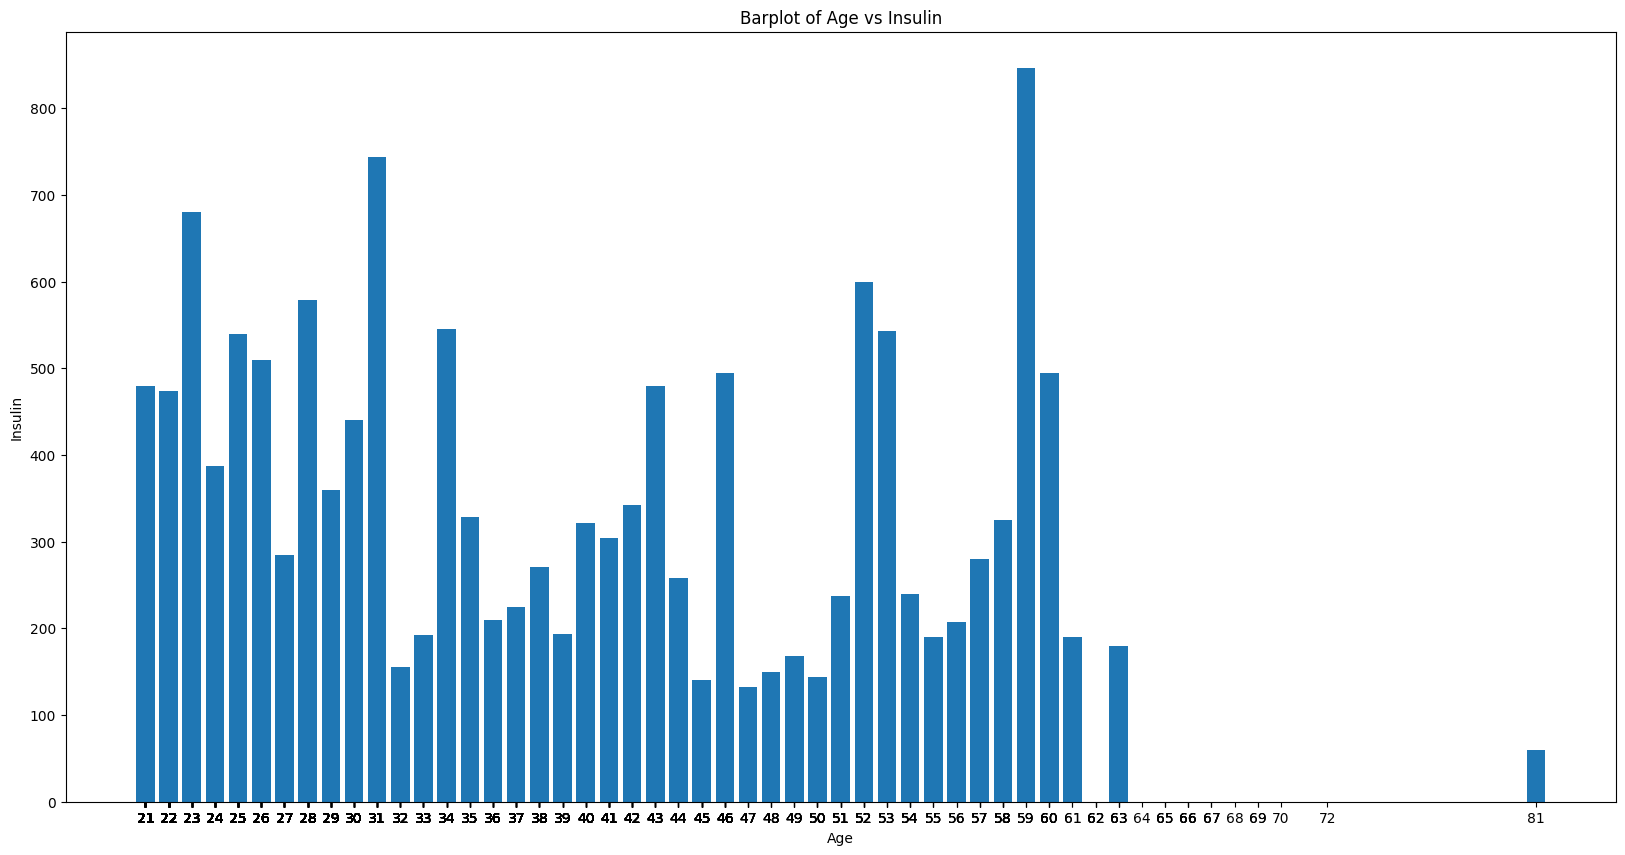

In [12]:
# Age vs Insulin 
x = []
for age in df.Age:
    x.append(age)
y = df.Insulin
plt.figure(figsize=(20,10))
plt.bar(x,y)
#for index, value in enumerate(y):
 #   plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Age",size=10)
plt.ylabel("Insulin")
plt.xticks(x)
plt.title("Barplot of Age vs Insulin")
plt.show()
plt.show()

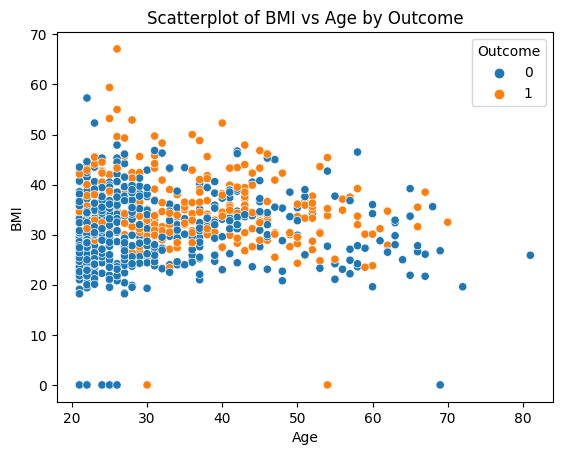

In [13]:
# BMI vs Age by Outcome
sns.scatterplot(x = 'Age', y ='BMI', hue = 'Outcome', data = df)
plt.title('Scatterplot of BMI vs Age by Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

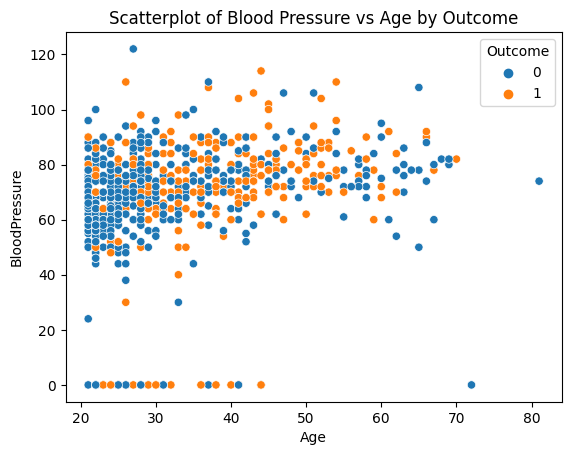

In [14]:
# BloodPressure vs Age by Outcome
sns.scatterplot(x = 'Age', y ='BloodPressure', hue = 'Outcome', data = df)
plt.title('Scatterplot of Blood Pressure vs Age by Outcome')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

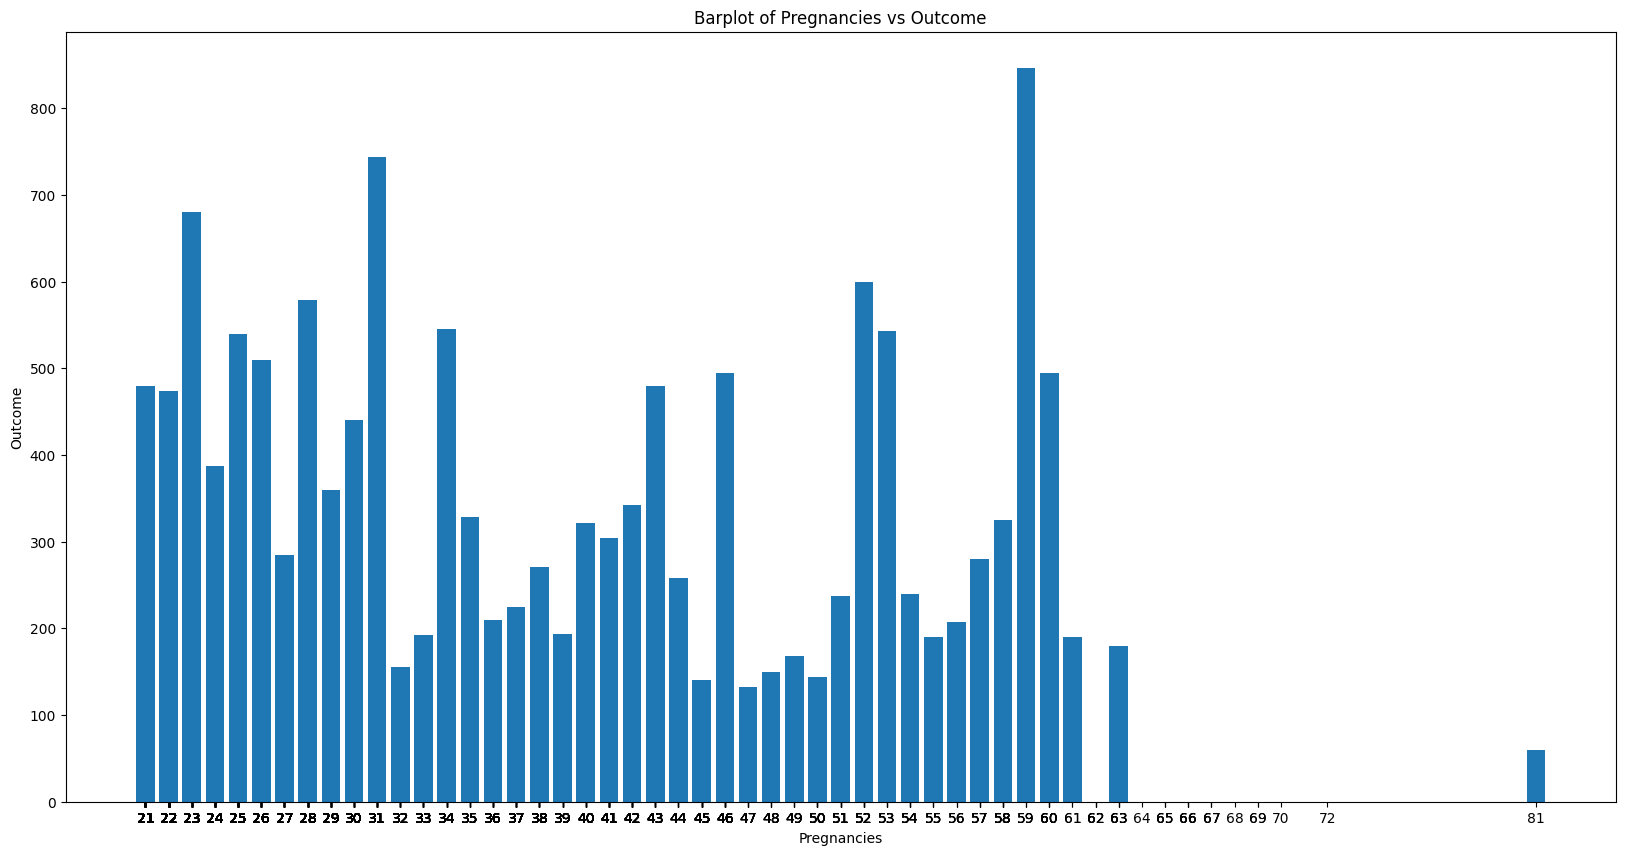

In [15]:
# Pregnancies vs Outcome 
x = []
for age in df.Age:
    x.append(age)
y = df.Insulin
plt.figure(figsize=(20,10))
plt.bar(x,y)
#for index, value in enumerate(y):
 #   plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Pregnancies",size=10)
plt.ylabel("Outcome")
plt.xticks(x)
plt.title("Barplot of Pregnancies vs Outcome")
plt.show()
plt.show()

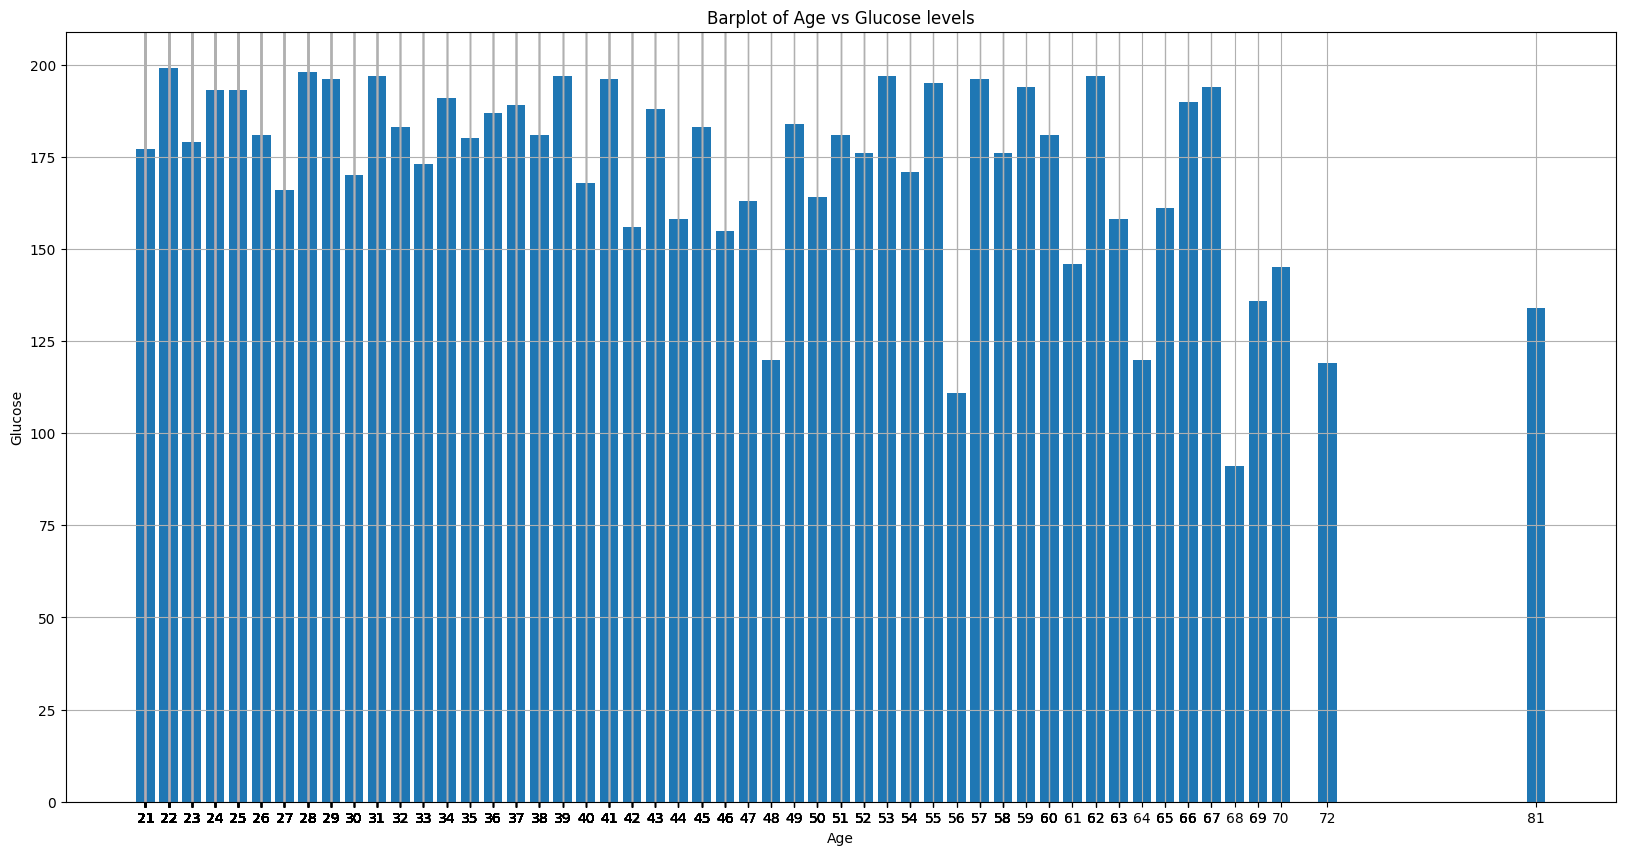

In [16]:
# Age vs Glucose
x = []
for age in df.Age:
    x.append(age)
y = df.Glucose
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xlabel("Age",size=10)
plt.ylabel("Glucose")
plt.xticks(x)
plt.grid()
plt.title("Barplot of Age vs Glucose levels")
plt.show()

<AxesSubplot: xlabel='Pregnancies', ylabel='Glucose'>

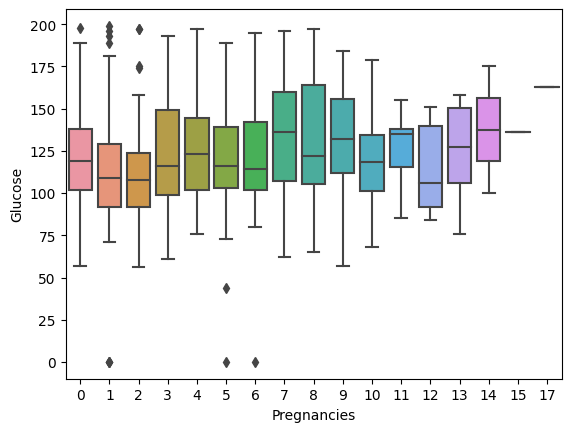

In [17]:
sns.boxplot(x = "Pregnancies", y = "Glucose", data = df)

### From the above analysis we have gained the following understandings
#### > People that are older are more Diabetic
#### > Non-diabetic people have lower blood pressure
#### > Diabetic people have higher insulin levels
#### > Diabetes does not depend on the number of pregnancies
#### > Non-diabetic people have lower glucose levels

##  Data Preprocessing and Model Development
### Here I'll be building a Logistic Regression Machine Learning Model 

In [18]:
# Defining the independent variable x and the dependent variable y
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [19]:
# Standardization of data to fit in the model 
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [46]:
std_data = scaler.fit_transform(X)

In [22]:
print(std_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
# Using the preprocessed standerdized data for training and testing
X = std_data
y = df["Outcome"]
print(X)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [24]:
# Splitting the data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# Building the model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression(max_iter = 1000)

In [30]:
# Training the model on the training data
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Making predictions on the training and testing data
pred_train = logmodel.predict(X_train)
pred_test = logmodel.predict(X_test)

## Model Evaluation

In [32]:
from sklearn.metrics import classification_report

In [33]:
# Classification report of training data
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       332
           1       0.74      0.58      0.65       182

    accuracy                           0.78       514
   macro avg       0.77      0.74      0.75       514
weighted avg       0.78      0.78      0.77       514



In [34]:
# Classification report of testing data
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [35]:
# Calculation of accuracy of the model by using the concept of confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_train, pred_train)

array([[295,  37],
       [ 76, 106]], dtype=int64)

In [38]:
confusion_matrix(y_test, pred_test)

array([[136,  32],
       [ 34,  52]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
# Accuracy score of training data
score = accuracy_score(y_train, pred_train)
print('Accuracy score of training data: ', score)

Accuracy score of training data:  0.7801556420233463


In [41]:
# Accuracy score of testing data
score = accuracy_score(y_test, pred_test)
print('Accuracy score of testing data: ', score)

Accuracy score of testing data:  0.7401574803149606


### Therefore, we now have a Diabetes Prediction Model using Logistic Regression with an accuracy rate of 75% or 0.75

## Model Implementation in Real World

In [47]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [49]:
input_data = (0,180,66,39,0,42,1.893,25)

# Changing the input data to a numpy array
input_numarray = np.asarray(input_data)

# Reshaping the array for predicting single datapoint
input_reshaped_data = input_numarray.reshape(1,-1)

# Standardize the input data
standard_data = scaler.transform(input_reshaped_data)
print(standard_data)

prediction = logmodel.predict(standard_data)
print(prediction)

if(prediction[0] == 0):
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

[[6.47630098e-17 1.80000000e+02 6.60000000e+01 3.90000000e+01
  3.00685403e-17 4.20000000e+01 1.89300000e+00 2.50000000e+01]]
[1]
The person is diabetic
